# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

## Importing and Exploring the dataset

In [2]:
data = pd.read_csv('flipkart_tweets.csv')

In [8]:
data.head(20)

,Unnamed: 0,Flipkart_tweets
0,0,Poonawala is doing it like those 'Big Dhamaka'...
1,1,Which is your favourite feature of the #realme...
2,2,Time to capture and #DelightEveryMoment with #...
3,3,This is ridiculous just connected with Cc he t...
4,4,This is what happens with me I bought a watch ...
5,5,"Be your happiest self. \nWith SwatchShil, keep..."
6,6,Dear @Flipkart where is my order. It was suppo...
7,7,This is what happens with me I bought a watch ...
8,8,iFFALCON 139 cm (55 inches) 4K Ultra HD Smart ...
9,9,Guys help me find any pharmacy in Patna which ...


### Cleaning the text

In [4]:
def clean_text(text):
    clean_words = re.sub("https\S+","",text)
    clean_words = re.sub("#[\w]*","",clean_words)
    clean_words = re.sub("@[\w]*","",clean_words)
    clean_words = re.sub("[^a-zA-Z0-9]"," ",clean_words)
    return clean_words

In [10]:
clean_text(data['Flipkart_tweets'][50])

'I was ordered a slip on  Sports shoes from   and received a lace up sports shoes and  '

In [11]:
clean_data = data.iloc[:,1].apply(clean_text)

In [12]:
clean_data.tail(20)

2980    Worst experience and pathetic service after ma...
2981    Worst services by flipkart when needed they de...
2982    Flipkart  Amazon Sale On Mobiles  Check Latest...
2983     D Lyf Oxygen concentrator is available at Fli...
2984    Hey  I m facing issue while selecting DOB in f...
2985    OTP is  but not  please  to explain why this i...
2986    Dear   This product MRP is 370 where as you ar...
2987    82  Off   American Tourister Suitcases  1399  ...
2988    Waiting since 12 days   But not delivered expe...
2989    I   this product on Flipkart  Fabrika Women Ku...
2990                           Don t shopping Flipkart   
2991    Deodorants  amp  Perfumes Best selling Range U...
2992    Have worked really hard on this to get stuck w...
2993    Herez my knock out entry team  I did 75 knock ...
2994            Flipkart to acquire cleartrip     Join   
2995      37   1  Quick brings 90 minute delivery to D...
2996     hello buddy    cool dude       nice collection  
2997    I did 

In [13]:
clean_data = pd.DataFrame(clean_data)

## Subjectivity and Polarity

In [14]:
# Get the subjectivity and polarity
def get_sub(text):
    return TextBlob(text).sentiment.subjectivity

def get_pol(text):
    return TextBlob(text).sentiment.polarity

In [25]:
get_pol(clean_data.iloc[2,0])

1.0

In [26]:
# Adding Subjectivity and Polarity to the data

clean_data['Subjectivity'] = clean_data.iloc[:,0].apply(get_sub)
clean_data['Polarity'] = clean_data.iloc[:,0].apply(get_pol)

In [27]:
clean_data.head(20)

,Flipkart_tweets,Subjectivity,Polarity
0,Poonawala is doing it like those Big Dhamaka ...,0.216667,0.125000
1,Which is your favourite feature of the 5G 1...,1.000000,0.000000
2,Time to capture and with The 44MP OIS Night...,1.000000,1.000000
3,This is ridiculous just connected with Cc he t...,0.500000,-0.166667
4,This is what happens with me I bought a watch ...,0.000000,0.000000
5,Be your happiest self With SwatchShil keep ...,0.550000,0.168182
6,Dear where is my order It was supposed to re...,0.000000,0.000000
7,This is what happens with me I bought a watch ...,0.000000,0.000000
8,iFFALCON 139 cm 55 inches 4K Ultra HD Smart ...,0.642857,0.214286
9,Guys help me find any pharmacy in Patna which ...,0.000000,0.000000


In [28]:
clean_data[clean_data['Polarity']>0.5]  #positive comments

,Flipkart_tweets,Subjectivity,Polarity
2,Time to capture and with The 44MP OIS Night...,1.000000,1.000000
24,We thank you from the deepest of our hearts fo...,1.000000,0.600000
59,Here I completed the Challenge Biggest wis...,0.400000,0.800000
62,IPL 2021 quiz question on Flipkart Quiz April ...,0.600000,0.550000
65,IPL 2021 quiz question on Flipkart Quiz April ...,0.600000,0.550000
...,...,...,...
2876,Never Compromise on Your Style amp Comfort ...,0.300000,1.000000
2951,Very good deal Blue Star 1 5 Ton 3 Star Sp...,0.560000,0.503333
2953,To learn more kindly fill in the form linked ...,0.633333,0.533333
2991,Deodorants amp Perfumes Best selling Range U...,0.300000,1.000000


In [29]:
clean_data[clean_data['Polarity']<-0.5]   #negative comments

,Flipkart_tweets,Subjectivity,Polarity
56,hey My package is arriving today by 9 pm ...,1.000000,-1.00
74,What is this Xiaomi REDMI You launch REDMI NOT...,1.000000,-0.80
129,Flipkart mobile exchangeoffer disappointed ...,0.750000,-0.75
130,OD221549378966624000 What the worst service ...,0.700000,-0.55
277,Order I d OD121489493703116000 The worst pro...,1.000000,-1.00
...,...,...,...
2780,waiting waiting waiting Worst experience e...,1.000000,-1.00
2851,Very irritating and bad experience shopping fr...,0.833333,-0.61
2973,Miss amp Chief Boys amp Girls Velcro Casua...,0.866667,-0.50
2974,This is so stupid My flight was cancelled fro...,1.000000,-0.80


In [30]:
clean_data[clean_data['Subjectivity']>0.5]

,Flipkart_tweets,Subjectivity,Polarity
1,Which is your favourite feature of the 5G 1...,1.000000,0.000000
2,Time to capture and with The 44MP OIS Night...,1.000000,1.000000
5,Be your happiest self With SwatchShil keep ...,0.550000,0.168182
8,iFFALCON 139 cm 55 inches 4K Ultra HD Smart ...,0.642857,0.214286
10,I ordered a groceries on Flipkart but unfortun...,1.000000,-0.500000
...,...,...,...
2981,Worst services by flipkart when needed they de...,0.688889,-0.500000
2988,Waiting since 12 days But not delivered expe...,0.825000,-0.250000
2992,Have worked really hard on this to get stuck w...,0.547222,0.236111
2993,Herez my knock out entry team I did 75 knock ...,0.725000,0.716667


## Sentiment function

In [31]:
def sentiment(polarity):
    if polarity>0.3:
        return 'Positive'
    elif polarity<-0.3:
        return 'Negative'
    else:
        return 'Neutral'

In [32]:
clean_data['Sentiment'] = clean_data['Polarity'].apply(sentiment)

In [33]:
clean_data.head(20)

,Flipkart_tweets,Subjectivity,Polarity,Sentiment
0,Poonawala is doing it like those Big Dhamaka ...,0.216667,0.125000,Neutral
1,Which is your favourite feature of the 5G 1...,1.000000,0.000000,Neutral
2,Time to capture and with The 44MP OIS Night...,1.000000,1.000000,Positive
3,This is ridiculous just connected with Cc he t...,0.500000,-0.166667,Neutral
4,This is what happens with me I bought a watch ...,0.000000,0.000000,Neutral
5,Be your happiest self With SwatchShil keep ...,0.550000,0.168182,Neutral
6,Dear where is my order It was supposed to re...,0.000000,0.000000,Neutral
7,This is what happens with me I bought a watch ...,0.000000,0.000000,Neutral
8,iFFALCON 139 cm 55 inches 4K Ultra HD Smart ...,0.642857,0.214286,Neutral
9,Guys help me find any pharmacy in Patna which ...,0.000000,0.000000,Neutral


In [34]:
clean_data[clean_data['Sentiment']=='Negative']['Flipkart_tweets']

10      I ordered a groceries on Flipkart but unfortun...
27                                   Ads gone wrong      
33      Hello  I got a courier today  I know its a fak...
56      hey    My package is  arriving today by 9 pm  ...
74      What is this Xiaomi REDMI You launch REDMI NOT...
                              ...                        
2960    Fake promises n you expect the customer to wai...
2973    Miss  amp  Chief Boys  amp  Girls Velcro Casua...
2974    This is so stupid  My flight was cancelled fro...
2980    Worst experience and pathetic service after ma...
2981    Worst services by flipkart when needed they de...
Name: Flipkart_tweets, Length: 153, dtype: object

In [35]:
clean_data['Sentiment'].value_counts()

Neutral     2302
Positive     545
Negative     153
Name: Sentiment, dtype: int64

## WordCloud for Neagtive Sentiment

In [36]:
text_list = list(clean_data[clean_data['Sentiment']=='Negative']['Flipkart_tweets'])
text = ' '.join(text_list)

Here, we have created a string of text of a list which includes the negative sentiment tweets

In [37]:
text

'I ordered a groceries on Flipkart but unfortunately in my grocery refined oil is leaked on all my product during de   Ads gone wrong       Hello  I got a courier today  I know its a fake offer but just wanted to bring it to your notice to confir   hey    My package is  arriving today by 9 pm  but it s not out for delivery yet  Worst trac   What is this Xiaomi REDMI You launch REDMI NOTE 10 Base variant under 11999 Rs  But it is selling base variant in a   What wrong with you   Still unresolved and no updates yet   Flipkart  mobile exchangeoffer  disappointed  to me  This is cheat work  OD221549378966624000 What the worst service   Didnt expected from flipkart No product in package    I just opened t    Updated  Flipkart Quiz Answers  28th April   1  Fake Or Not   1  Not Fake 2  Fake 3  Fake  2  Aage Kya   1  A Guy   Flipkart Videos Answers       Fake or Not   1  Not Fake 2  Fake  3  Fake    Aage Kya   1  C   Totally unfair game between customer and flipkart  If u dont have capacity to

In [38]:
# let us remove the stopwords and make a new text 

In [50]:
lis = ['s','t','rt','hi','hello','flipkart','thanks','please','amazon']
text_n=''
for i in text.split():
    if i.lower() not in lis:
        text_n = text_n+' '+i.lower()

In [51]:
text_n

' time to capture and with the 44mp ois night selfie mode captures perfect selfies even avoid buying tvs in by seeing great offers i bought a tv with good offer later they cancelled the order travancore ayurveda immunity pack available now on one of the most popular e commerce platform immunity we thank you from the deepest of our hearts for initiating an excellent amp powerful movement glad to see moto g60 with sd 732g 108mp camera for rs 17 999 now available on 1 500 instan nokia 164 cm 65 inch ultra hd 4k led smart android tv with sound by onkyo 749 with hdfc credit card norm a minimalist design with smooth contours makes the a smart purchase get it from the 5g is up for grabs mediatek dimensity 700 5g processor 8 5mm super slim 90hz ultra smooth disp accept my return request of the order asap i will not be able to wait anymore now resolve the issue by here i completed the challenge biggest wish to win ipl 2021 quiz question on quiz april 28 2021 give answers to win exciting prizes 

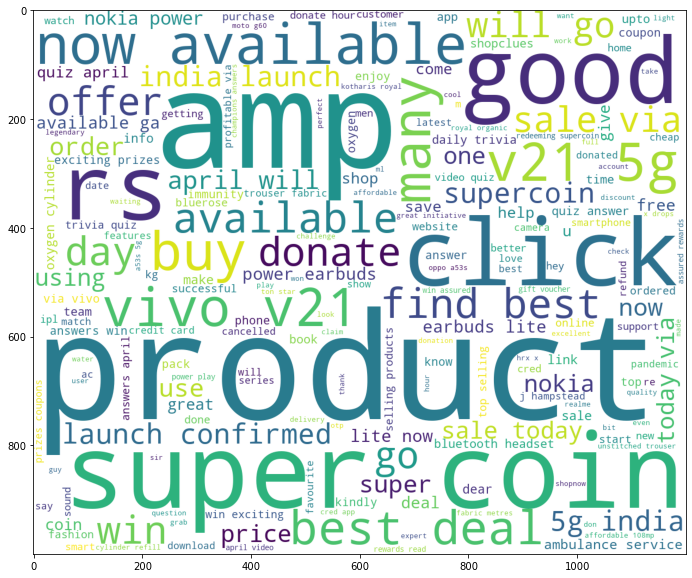

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
wc = WordCloud(width=1200,height=1000,background_color='white').generate(text_n)
plt.imshow(wc)
plt.show()

## WordCloud for Positive Sentiment

In [42]:
text_list = list(clean_data[clean_data['Sentiment']=='Positive']['Flipkart_tweets'])
text = ' '.join(text_list)

Here, we have created a string of text of a list which includes the positive sentiment tweets

In [53]:
lis = ['s','t','rt','hi','hello','flipkart','thanks','please','amazon']
text_n=''
for i in text.split():
    if i.lower() not in lis:
        text_n = text_n+' '+i.lower()

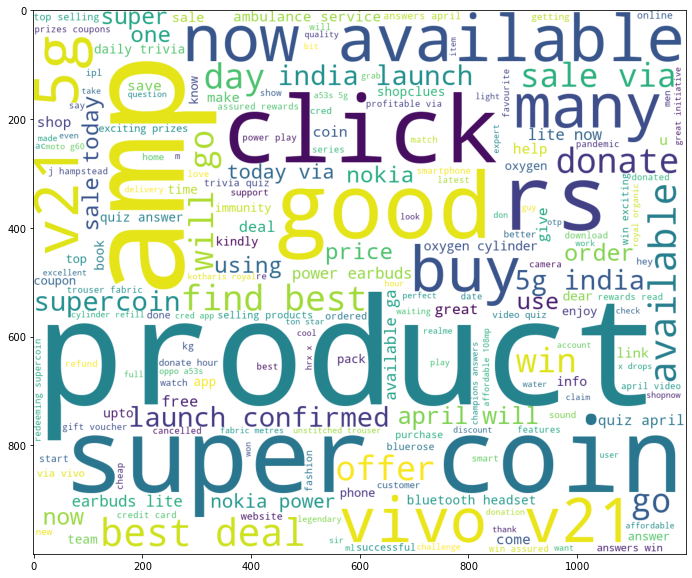

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
wc = WordCloud(width=1200,height=1000,background_color='white').generate(text_n)
plt.imshow(wc)
plt.show()